In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv('synthetic_data.csv')

# Display the first few rows of the dataset
df.head()

,Date,Time,Stop/Station,Passenger_Count,Vehicle_ID,Latitude,Longitude,Temperature (°C),Precipitation (mm),Humidity (%),Age_Group,Gender,Feedback
0,2023-11-16,12:03,Johor Bahru,46,BUS257,6.102314,116.511921,10,1,92,18-24,Male,Outlier
1,2023-07-14,05:07,Cameron Highlands,252,TRAIN21,6.514667,118.006658,15,3,65,18-24,Female,Duplicate
2,2023-09-22,14:11,Ipoh,51,BUS502,5.404017,104.333505,22,3,90,18-24,Female,Seats were uncomfortable
3,2022-07-12,09:11,Penang,38,TRAIN24,4.878923,110.393544,16,3,89,25-40,Male,Service was excellent
4,2023-12-09,16:59,Kuching,136,BUS365,4.842396,109.841581,15,1,50,40-60,Female,Route was confusing


### 1. Histograms:
Histograms are useful for visualizing the distribution of numerical variables.

In [ ]:
# %matplotlib inline

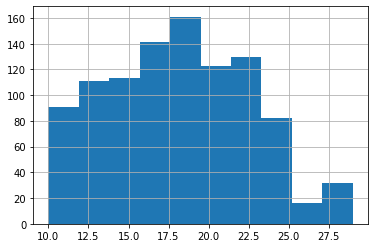

In [90]:
# # Create histograms for numerical variables
# df['Temperature (°C)'].hist(figsize=(6, 4)) # (6.4,4.8) 
# plt.tight_layout()
# # plt.grid(False)
# plt.show()
plt.hist(df['Temperature (°C)'],bins=10)
plt.grid()
plt.show()

### 2. Scatter Plot:
Scatter plots can help visualize the relationship between two numerical variables.

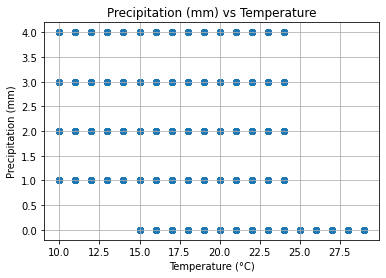

In [94]:
# Create a scatter plot of Passenger_Count vs Temperature
X=df['Temperature (°C)']
Y=df['Precipitation (mm)']
plt.scatter(X,Y)
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation (mm) vs Temperature')
plt.grid(True)
plt.show()

### 3. Bar Chart:
A bar chart can be useful for visualizing categorical variables.

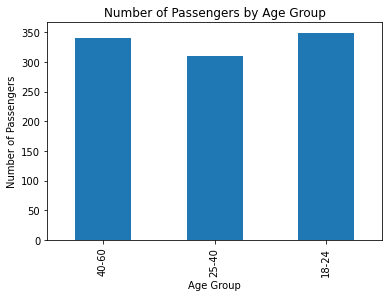

40-60    341
25-40    310
18-24    349
Name: Age_Group, dtype: int64

In [106]:
# Create a bar chart for the count of passengers by Age_Group
passenger_by_age = df['Age_Group'].value_counts().sort_index(ascending=False)
passenger_by_age.plot(kind='bar')
# passenger_by_age.plot(kind='pie')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Age Group')
plt.show()
df['Age_Group'].value_counts().sort_index(ascending=False)

### 4. Box Plot:
A box plot (or box-and-whisker plot) is useful for visualizing the distribution of numerical data and identifying outliers.

<Figure size 576x432 with 0 Axes>

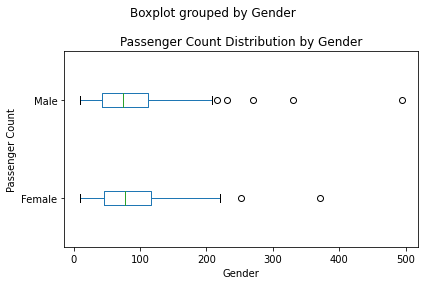

In [104]:
# Create a box plot of Passenger_Count by Gender
plt.figure(figsize=(8, 6)) #  Default Figure Size (6.4,4.8)
df.boxplot(column='Passenger_Count', by='Gender', vert=False)
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Distribution by Gender')
plt.tight_layout()
plt.grid(False)
plt.show()

### 5. Pie Chart:
A pie chart can be used to visualize the distribution of a categorical variable as a proportion of the whole.

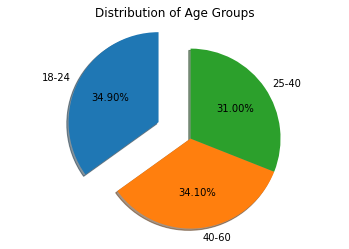

In [124]:
# Create a pie chart of the distribution of Age_Group
age_group_counts = df['Age_Group'].value_counts()
plt.pie(age_group_counts, labels=age_group_counts.index, explode = (0.4,0,0), autopct='%1.2f%%', startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()
# df['Age_Group'].value_counts()

### 6. Line Plot:
A line plot is useful for visualizing trends or patterns over time or other ordered variables.

In [127]:
# Trand Analysis
# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year
df_year = df[(df['Date'].dt.year == 2022)]

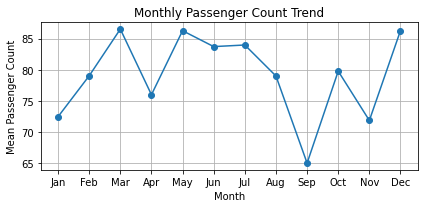

In [128]:
# Group by month and calculate the mean passenger count for each month
monthly_mean_count_year = df_year.groupby(df_year['Date'].dt.month)['Passenger_Count'].mean()

# Plot the monthly passenger count trend for the year
plt.figure(figsize=(6, 3))
monthly_mean_count_year.plot(marker='o', linestyle='-')
plt.title('Monthly Passenger Count Trend')
plt.xlabel('Month')
plt.ylabel('Mean Passenger Count')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()